# Bajaj Finance Time series forecasting

## Pre-processing

In [2]:
# importing necessary libraries 
import pandas as pd
import numpy as np 

In [12]:
# reading the dataset 
df = pd.read_csv("/content/BAJFINANCE.csv")
df.sample(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2781,2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.0,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900
3708,2015-02-27,BAJFINANCE,EQ,4096.85,4110.05,4159.90,4061.05,4100.5,4107.10,4093.31,28081,1.149443e+13,4203.0,22050.0,0.7852
4640,2018-12-05,BAJFINANCE,EQ,2543.55,2539.90,2539.90,2470.30,2508.0,2494.10,2504.04,1327031,3.322939e+14,62196.0,348468.0,0.2626
712,2003-02-18,BAJAUTOFIN,EQ,50.60,50.45,51.15,50.45,50.6,50.80,50.87,13793,7.016726e+10,NaN,9474.0,0.6869
4422,2018-01-15,BAJFINANCE,EQ,1770.10,1771.00,1794.90,1733.00,1737.0,1738.15,1758.11,847037,1.489187e+14,33803.0,470863.0,0.5559


In [13]:
df.shape

(5070, 15)

In [14]:
# setting date as index 
df.set_index("Date", inplace=True)

In [15]:
df.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Prev Close,5070.0,1.311476e+03,1.782013e+03,2.450000e+01,1.054000e+02,5.363750e+02,1.757525e+03,1.139330e+04
Open,5070.0,1.312330e+03,1.781956e+03,2.520000e+01,1.042750e+02,5.349750e+02,1.764012e+03,1.130000e+04
High,5070.0,1.334301e+03,1.808504e+03,2.520000e+01,1.086250e+02,5.520000e+02,1.784600e+03,1.177000e+04
Low,5070.0,1.289350e+03,1.753704e+03,2.450000e+01,1.007250e+02,5.221500e+02,1.740550e+03,1.129400e+04
Last,5070.0,1.312279e+03,1.782393e+03,2.450000e+01,1.069375e+02,5.364000e+02,1.760037e+03,1.138670e+04
Close,5070.0,1.312155e+03,1.782187e+03,2.450000e+01,1.077250e+02,5.377250e+02,1.757750e+03,1.139330e+04
VWAP,5070.0,1.312441e+03,1.781825e+03,2.520000e+01,1.066850e+02,5.379900e+02,1.758297e+03,1.149073e+04
Volume,5070.0,5.060571e+05,1.798886e+06,3.000000e+00,4.697750e+03,1.567200e+04,8.194950e+04,2.596010e+07
Turnover,5070.0,1.294532e+14,4.906711e+14,1.047000e+07,6.755000e+10,7.783766e+11,2.306237e+13,8.787972e+15
Trades,2291.0,4.710584e+04,1.015143e+05,2.100000e+01,1.519500e+03,9.603000e+03,4.883600e+04,9.791110e+05


In [17]:
# checking for null values 
df.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [18]:
# dropping the missing values 
df.dropna(inplace=True)

## Visualization

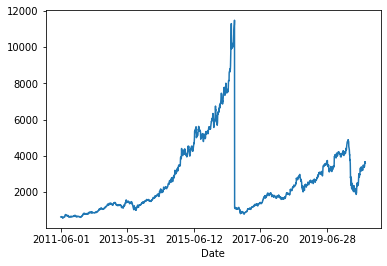

In [19]:
df['VWAP'].plot()

## Feature Engineering

In [20]:
# chcekpoint by copying the data
data = df.copy()

data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [21]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [22]:
# considering features where moving avg and rolling concepts that can be applied
lag_features = ['High', "Low", 'Volume', 'Turnover', 'Trades']

# rolling windows
window1 = 3
window2 = 7

In [40]:
for feature in lag_features:
  data[feature+'rolling_mean_3'] = data[feature].rolling(window=window1).mean()
  data[feature+'rolling_mean_7'] = data[feature].rolling(window=window2).mean()
  data[feature+'rolling_std_3'] = data[feature].rolling(window=window1).std()
  data[feature+'rolling_std_7'] = data[feature].rolling(window=window2).std()

In [41]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highrolling_mean_3,Highrolling_mean_7,Highrolling_std_3,Lowrolling_mean_3,Lowrolling_mean_7,Lowrolling_std_3,Volumerolling_mean_3,Volumerolling_mean_7,Volumerolling_std_3,Turnoverrolling_mean_3,Turnoverrolling_mean_7,Turnoverrolling_std_3,Tradesrolling_mean_3,Tradesrolling_mean_7,Tradesrolling_std_3,Highrolling_std_7,Lowrolling_std_7,Volumerolling_std_7,Turnoverrolling_std_7,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJFINANCE,EQ,635.60,639.80,647.00,630.00,630.00,631.10,638.27,31252,1.994715e+12,894.0,18626.0,0.5960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-10,BAJFINANCE,EQ,631.10,641.85,648.25,618.55,621.10,622.20,634.16,30885,1.958588e+12,1360.0,12656.0,0.4098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-13,BAJFINANCE,EQ,622.20,616.00,627.85,616.00,622.75,624.95,622.92,3981,2.479856e+11,250.0,1745.0,0.4383,641.033333,NaN,11.434196,621.516667,NaN,7.456597,22039.333333,NaN,15640.051929,1.400430e+12,NaN,9.982094e+11,834.666667,NaN,557.373603,NaN,NaN,NaN,NaN,NaN
2011-06-14,BAJFINANCE,EQ,624.95,625.00,628.95,619.95,621.20,622.10,625.35,5597,3.500088e+11,198.0,3717.0,0.6641,635.016667,NaN,11.473593,618.166667,NaN,2.002707,13487.666667,NaN,15088.183102,8.521943e+11,NaN,9.595224e+11,602.666667,NaN,656.385050,NaN,NaN,NaN,NaN,NaN
2011-06-15,BAJFINANCE,EQ,622.10,612.00,623.00,598.10,605.00,601.70,606.90,12590,7.640851e+11,481.0,9021.0,0.7165,626.600000,NaN,3.165833,611.350000,NaN,11.643560,7389.333333,NaN,4575.812970,4.540265e+11,NaN,2.733211e+11,309.666667,NaN,150.639747,NaN,NaN,NaN,NaN,NaN


In [42]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Highrolling_std_3', 'Lowrolling_mean_3', 'Lowrolling_mean_7',
       'Lowrolling_std_3', 'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Volumerolling_std_3', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Turnoverrolling_std_3',
       'Tradesrolling_mean_3', 'Tradesrolling_mean_7', 'Tradesrolling_std_3',
       'Highrolling_std_7', 'Lowrolling_std_7', 'Volumerolling_std_7',
       'Turnoverrolling_std_7', 'Tradesrolling_std_7'],
      dtype='object')

In [43]:
data.shape

(2285, 34)

In [44]:
data.isnull().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Highrolling_std_3         2
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Lowrolling_std_3          2
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Volumerolling_std_3       2
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Turnoverrolling_std_3     2
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Tradesrolling_std_3       2
Highrolling_std_7         6
Lowrolling_std_7          6
Volumerolling_std_7       6
Turnoverrolling_std_7     6
Tradesrolling_std_7       6
dtype: int64

In [45]:
# dropping the missing values
data.dropna(inplace=True)

## Model Building

In [46]:
ind_features = ['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [47]:
train_data = data[0:1800]
test_data = data[1800:]

In [48]:
!pip install pmdarima

In [49]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [50]:
model = auto_arima(y=train_data['VWAP'], exogenous=train_data[ind_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20932.902, Time=6.80 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20926.540, Time=3.37 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20927.674, Time=3.45 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20927.646, Time=4.86 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32618.212, Time=3.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20930.546, Time=5.27 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 26.941 seconds


In [52]:
model.fit(train_data['VWAP'],train_data[ind_features])

ARIMA(maxiter=50, method='lbfgs', order=(0, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [53]:
forecast = model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

test_data['Forecast_ARIMA'] = forecast 

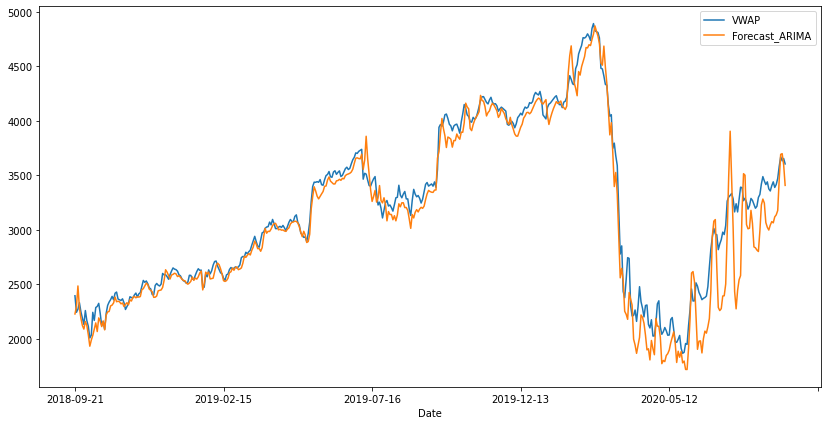

In [54]:
test_data[['VWAP', 'Forecast_ARIMA']].plot(figsize=(14,7))

* The Auto ARIMA model seems to do a fairly good job in predicting the stock price.

### Performance metrics

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

np.sqrt(mean_squared_error(test_data['VWAP'], test_data['Forecast_ARIMA']))

183.34909955269697

In [56]:
mean_absolute_error(test_data['VWAP'], test_data['Forecast_ARIMA'])

122.31854416969666